# Ten intensities — A bigger data set

Now we're going to load an even larger data set. The `ten_intensities` data set expands on the optogenetic spike train data we worked with in the previous chapter. Now we have 10 trials of spike train data, but recorded when the neuron was stimulated with ten different intensities of the 550 nm green light that activates its receptors — so 100 trials in total. Measuring the neuron's response across a range of intensities allows us to map out the response "profile" of the neuron in terms of the number of spikes elicited by differing intensities. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

<div class="alert alert-block alert-info">
    <h3>A fine pickle we've got ourselves in:</h3>
   
Naturally, the first cell in our notebook imports the packages we'll need. Most of the content in the cell below is stuff you've seen before. The one new thing is `import pickle`. Naturally, a programming language named after a snake has a library named after preserved cucumbers! In fact, [**pickling**](https://docs.python.org/3/library/pickle.html) in Python is a way of preserving objects for future use. Recall that Python is an *object-oriented* language, which for purposes of this explanation means that most "things" in Python are objects. This includes ways of storing data such as lists and dictionaries. Pickling is a way of storing objects like this — typically containing data — so that you can later re-load them easily. This can be especially useful if you have complex code or large data sets, where it might take a long time to run the code to get the data into the form that you want (e.g., lots of processing steps, or a computationally-intensive machine learning algorithm).

In many cases, you can — and should — store data in more standard file formats like text or CSV (which is a specific format of a text file, with commas indicating breaks between columns). However, such files store data in a basic, tabular structure, whereas Python objects like dictionaries have their own unique structures that serve specific purposes. The end result of a data processing workflow may well be a dictionary or some other Python object that doesn't easily lend itself to saving in a text file, in which case pickling can be useful. Also, pickling is formally a type of **serialization** — putting a Python object into a **byte stream** which simply means it's an ordered set of bytes. Serialization allows Python objects to be easily transmitted over internet protocols like TCP/IP, so it can be useful in web applications. 

On the other hand, there are a few downsides to pickles. One is that they are inherently insecure. In general, you should not load pickles that you did not create, if you do not fully know and trust the source. Pickles can be "weaponized" to contain malicious code. Although we are using a pickle obtained from the internet in this exercise, it's from a trusted source: the publisher Elsevier's website. Secondly, because pickles are Python-specific, they are not a very open form of data storage. Pickles are not even strictly compatible between Python versions 2 and 3; below I had to adapt the code to import a Python 2 pickle into Python 3. It's a simple adaptation but nonetheless adds complexity. In general, for sharing data you should use standard file format types.

For more information on pickles, [DataCamp has a good article](https://www.datacamp.com/community/tutorials/pickle-python-tutorial).


First we load the data. The syntax here is different from what we've used to read CSV files into pandas, but it works for pickles.

In [2]:
with open('ten_intensities.pkl', 'rb') as handle:
    ten_intensities = pickle.load(handle, encoding='latin1')

When first starting to work with a data set, you need to explore it and understand how it's structured. What variable type(s) are in it? How are different experimental conditions coded? We'll walk through these steps below, first asking for the type:

In [3]:
type(ten_intensities)

dict

How big is it?

In [4]:
len(ten_intensities)

10

Dictionaries are key:value pairs. Let's view the keys of this dictionary to see how it's structured:

In [5]:
ten_intensities.keys()

dict_keys(['4_intensity', '2_intensity', '8_intensity', '0_intensity', '7_intensity', '5_intensity', '9_intensity', '6_intensity', '3_intensity', '1_intensity'])

So the keys indicate that these are different intensity values, spanning a range from 0–9. Let's look at what the values are for one of those keys:

In [6]:
ten_intensities['0_intensity']

[[83.0, 41.0],
 [14.0, 87.0, 18.0, 84.0],
 [24.0, 51.0, 66.0, 86.0, 96.0],
 [26.0, 14.0, 51.0, 20.0, 50.0, 23.0],
 [14.0, 27.0, 60.0, 45.0, 56.0, 58.0, 60.0],
 [48.0, 18.0, 40.0, 43.0],
 [13.0, 46.0, 47.0, 90.0],
 [33.0, 61.0, 55.0, 64.0, 56.0],
 [72.0, 64.0, 45.0, 82.0],
 [34.0, 74.0, 71.0, 53.0]]

OK, so it looks like for each intensity we have a list of lists, and each of those lists is a different length, and contains a range of values. We could hypothesize that those values range from 0–100, although we'd want to interrogate the data more to confirm that. Regardless, one intriguing thing is that these are not spike trains like we saw before, which were all of the same length (since each entry in the list represented a specific point in time) and which had values of only 0 or 1.

Let's look at another entry in the dictionary to get more of a sense of how the data for different intensities look:

In [7]:
ten_intensities['1_intensity']

[[61.0, 17.0, 36.0, 74.0],
 [13.0, 64.0, 30.0, 47.0],
 [20.0, 27.0, 56.0, 27.0, 68.0, 73.0, 59.0],
 [68.0, 46.0, 48.0, 25.0],
 [68.0, 34.0, 48.0, 22.0],
 [51.0, 66.0, 45.0, 49.0, 66.0, 40.0],
 [13.0, 51.0, 18.0, 58.0, 58.0],
 [23.0, 36.0, 71.0, 73.0],
 [24.0, 33.0, 32.0, 43.0, 15.0, 53.0, 70.0],
 [53.0, 35.0, 43.0, 23.0]]

It looks like there are the same number of lists in each dictionary entry, but we can confirm that with a simple loop through all the keys in the dictionary, and counts the number of values stored in each dictionary entry using the `len()` function:

In [8]:
for intensity_lev in ten_intensities.keys():
    print(intensity_lev + ' ' + str(len(ten_intensities.values())))

4_intensity 10
2_intensity 10
8_intensity 10
0_intensity 10
7_intensity 10
5_intensity 10
9_intensity 10
6_intensity 10
3_intensity 10
1_intensity 10


So it looks like we have 10 levels of intensity (intensity of what, we don't know), and 10 trials for each intensity level. However, within each trial the values aren't spike trains of zeros or ones, but instead values that appear to range between 0 and 100 (or some number less than 100). This is rather puzzling! This would be a hard data set to decode without some additional information from whoever provided the data, to tell us what it's encoding. Fortunately the authors who provided the data set, Nylen and Wallisch, are here to help. They tell us that the values in each list are spike times — in other words, the times at which spikes occur. As noted earlier, this is an alternative and more concise/efficient way of representing spike data; rather than needing to store data for every time point, we only store data for the time points at which spikes occur. There are different numbers of data points in each list (trial) because the neuron doesn't necessarily spike the same number of times on every trial. 

The data are still a bit confusing, though. Firstly, the values in these lists (the spike times) are not always sequential. For example, in the first list within `0_intensity`, the values are `[83.0, 41.0]`. Logically, we would expect the spike times to be temporally ordered. Moreover, in some cases a list has two identical values, for example:

In [9]:
ten_intensities['1_intensity'][5]

[51.0, 66.0, 45.0, 49.0, 66.0, 40.0]

It's unclear why the data are like this, and Nylen and Wallisch provide no insights in their book. Since this is only an example, and the plots below work and serve to demonstrate how to visualize this data, we won't worry about it too much. My suspicion is that they used a random number generator to generate simulated data. But exploring your data, and asking questions like this, is an important part of data science, and science more generally. If you identify strange or unexpected things in the data, it's worth investigating further and trying to understand *why*, rather than just assuming that whoever provided the data didn't make any mistakes. 

## Visualizing the Data

We'd like to plot spike train raster plots and PSTHs for this data set, as we did for the previous data. To do this, we'll need to consider how to show the different responses for each each intensity level. There are a few ways we could do this, but here we'll do it by adding more subplots, expanding on how we drew the raster plot and PSTH in the same figure in the previous page.

Here we'll build the code up in stages, first getting one plot working (a raster of one intensity level) and then adding the PSTH for that level, then plotting all the levels of intensity in different subplots, in a loop. We'll start with the highest intensity level (`9_intensity`) as our "test case" because we can expect that it will elicit the most intense responses. 

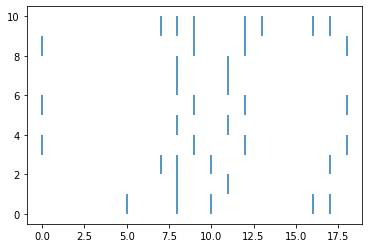

In [27]:
fig = plt.figure()

# Select the data from most intense stimulus
sample_dat = ten_intensities['9_intensity']

# plot raster for each trial
for trial in range(len(sample_dat)):
    plt.vlines(sample_dat[trial], trial, trial + 1)

Now we can add the PSTH for this intensity level. We'll add it as a second column:

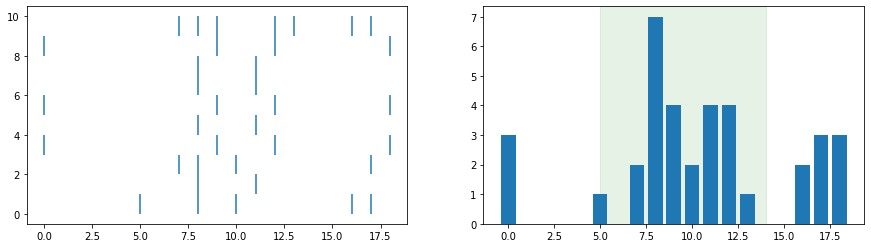

In [52]:
# here we hard-code the figure dimensions (x, y) to control the way the plot looks
fig = plt.figure(figsize=[15, 4])

# Select the data from most intense stimulus
sample_dat = ten_intensities['9_intensity']

# specify the subplots
ax = plt.subplot(1, 2, 1)

# plot raster for each trial
for trial in range(len(sample_dat)):
    plt.vlines(sample_dat[trial], trial, trial + 1)

# Now specify the subplot for the PSTH
ax = plt.subplot(1, 2, 2)

plt.axvspan(5, 14, alpha=0.1*float(key[0]), color='g')

# Next line is an neat trick using list comprehension: it takes the list of lists, 
# and outputs one long list of all the values (since for a histogram we don't 
# care which trial the data came from, we want to collapse over the trials)
spike_times = [a for b in sample_dat for a in b] 

# Make a histogram of the values. The range(20) argument ignores any data 
#   from time points past 20 s. Don't draw the histogram but return it as two variables. 
# According to its API, np.histogram returns two values: the histogram 
#   (which we visualize as the bar heights), and the bin edges (which define the x axis). 
# Since it returns two values, we assign the output to two variable names (n_out, bins):
n_out, bins = np.histogram(spike_times, bins=range(20))

# Draw the histogram with bins on the x axis and bar height as the y axis:
plt.bar(bins[:-1], n_out)

plt.show();

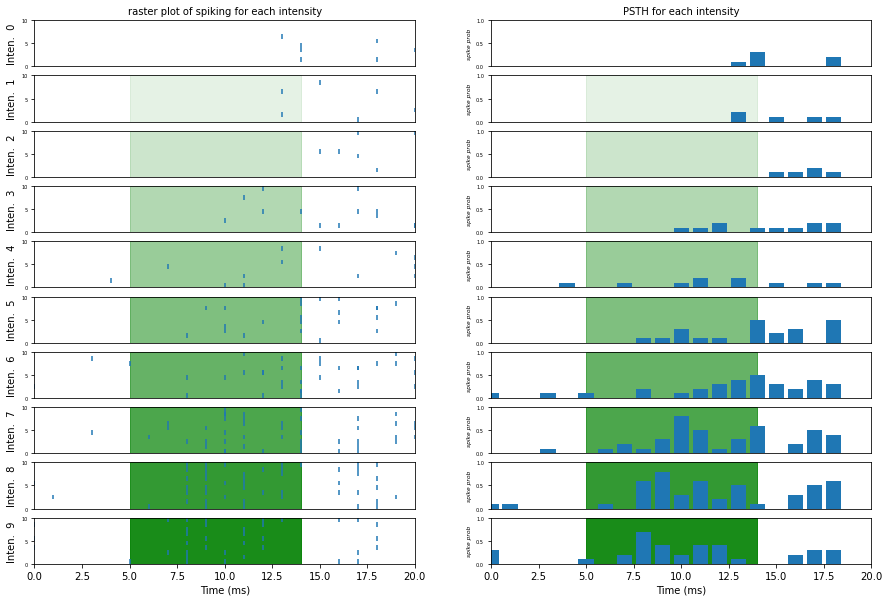

In [18]:
fig = plt.figure(figsize=[15, 10])

num_intensities = len(ten_intensities)
nbar={}
for key in ten_intensities.keys():

    # Raster plots
    # The line below sets the subplot in which to graph the data from a particular 
    # intensity level. Although dictionaries are not ordered, the resulting plot has the 
    # intensities ordered from lowest to highest. This works because the dictionary keys
    # in this case are the intensity levels, as numerals. So when we select the first 
    # character in the key (key[0]) and convert it to float, Python will select the 
    # approriate row of the figure to plot the data in. 
    # Another thing to note is that the rows are selected by mutiplying the intensity 
    # levels by two, then adding one. The +1 is because, in an exception to what is typical 
    # in Python, figure subplots are numbered from 1 rather than zero. So intensity 
    # level 0 goes in row 1 of the plot. Mutiplying by 2 is because we have two columns 
    # in the plot, and the subplots are numbered sequentially (i.e., subplot 2 is first 
    # row, second column, subplot 3 is first column second row, etc.)

    ax = plt.subplot(num_intensities, 2, int(key[0]) * 2 + 1)
 
    for trial in range(10): 
        plt.vlines(ten_intensities[key][trial], trial, trial + 1)
    plt.xlim([0, 20])
    plt.ylim([0, 10])
    plt.ylabel('Intensity  ' + str(key[0]), fontsize=10)
    plt.yticks(fontsize=5)
    
    # The line below sets the intensity of the green shading (indicating when the stimulus
    # was on) according to the intensity of the stimulus. This is done using the alpha 
    # argument to plt.axvspan. Alpha sets the transparency of a visual element, over a 
    # range from 0 (transparent) to 1 (opaque). So by multiplying by 0.1 we turn the 
    # intensity values (which range from 0 to 9) into acceptable alpha values.
    plt.axvspan(5, 14, alpha=0.1*float(key[0]), color='g')
    
    # Place x ticks and x label only below bottom row of plots:    
    if float(key[0]) < 9:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('Time (ms)')
        
    # Add title only above top row (intensity 0):
    if float(key[0]) == 0:
        plt.title('raster plot of spiking for each intensity',fontsize=10)
        
    # PSTHs    
    ax=plt.subplot(num_intensities, 2, int(key[0]) * 2 + 2)
    plt.axvspan(5, 14, alpha=0.1*float(key[0]), color='g')
    
    # Next line is an interesting list comprehension that takes the list of lists, 
    # and outputs one long list of all the values (since for a histogram we don't 
    # care which trial the data came from, we want to collapse over the trials)
    spike_times = [a for b in ten_intensities[key] for a in b] 
    
    # Make a histogram of the values. The range(20) argument ignores any data 
    # from time points past 20 s. Don't draw the histogram but return it as two variables. 
    # According to its API, np.histogram returns the values of the histogram as an array, 
    # and the bin edges
    n_out, bins = np.histogram(spike_times, bins=range(20))
    
    # Compute probability for the histogram by dividing by number of trials
    plt.bar(bins[:-1], n_out / 10)
    plt.xlim([0, 20])
    plt.ylim([0, 1])
    plt.yticks(fontsize=5)
    plt.ylabel('spike prob', style='italic', fontsize = 6)

    # place title only above the first row of plots:
    if float(key[0]) == 0:
        plt.title('PSTH for each intensity', fontsize=10)
        
    # Place x ticks and x label only below bottom row of plots:    
    if float(key[0]) < num_intensities-1:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('Time (ms)')
        
plt.show();

## Visualizing data across intensity levels

Our questions about the data notwithstanding, we know that we have spike train data from multiple trials, and the code below plots the data as rasters and PSTHs, as a function of intensity:

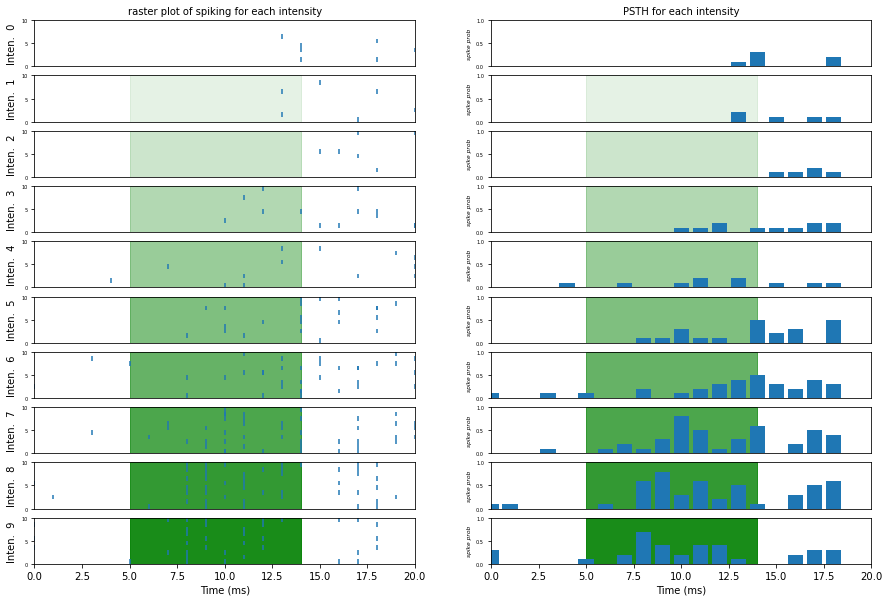

In [18]:
fig = plt.figure(figsize=[15, 10])
num_intensities = len(ten_intensities)
nbar={}
for key in ten_intensities.keys():

    # Raster plots
    # The line below sets the subplot in which to graph the data from a particular 
    # intensity level. Although dictionaries are not ordered, the resulting plot has the 
    # intensities ordered from lowest to highest. This works because the dictionary keys
    # in this case are the intensity levels, as numerals. So when we select the first 
    # character in the key (key[0]) and convert it to float, Python will select the 
    # approriate row of the figure to plot the data in. 
    # Another thing to note is that the rows are selected by mutiplying the intensity 
    # levels by two, then adding one. The +1 is because, in an exception to what is typical 
    # in Python, figure subplots are numbered from 1 rather than zero. So intensity 
    # level 0 goes in row 1 of the plot. Mutiplying by 2 is because we have two columns 
    # in the plot, and the subplots are numbered sequentially (i.e., subplot 2 is first 
    # row, second column, subplot 3 is first column second row, etc.)

    ax = plt.subplot(num_intensities, 2, int(key[0]) * 2 + 1)
 
    for trial in range(10): 
        plt.vlines(ten_intensities[key][trial], trial, trial + 1)
    plt.xlim([0, 20])
    plt.ylim([0, 10])
    plt.ylabel('Inten.  ' + str(key[0]), fontsize=10)
    plt.yticks(fontsize=5)
    
    # The line below sets the intensity of the green shading (indicating when the stimulus
    # was on) according to the intensity of the stimulus. This is done using the alpha 
    # argument to plt.axvspan. Alpha sets the transparency of a visual element, over a 
    # range from 0 (transparent) to 1 (opaque). So by multiplying by 0.1 we turn the 
    # intensity values (which range from 0 to 9) into acceptable alpha values.
    plt.axvspan(5, 14, alpha=0.1*float(key[0]), color='g')
    
    # Place x ticks and x label only below bottom row of plots:    
    if float(key[0]) < 9:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('Time (ms)')
        
    # Add title only above top row (intensity 0):
    if float(key[0]) == 0:
        plt.title('raster plot of spiking for each intensity',fontsize=10)
        
    # PSTHs    
    ax=plt.subplot(num_intensities, 2, int(key[0]) * 2 + 2)
    plt.axvspan(5, 14, alpha=0.1*float(key[0]), color='g')
    
    # Next line is an interesting list comprehension that takes the list of lists, 
    # and outputs one long list of all the values (since for a histogram we don't 
    # care which trial the data came from, we want to collapse over the trials)
    spike_times = [a for b in ten_intensities[key] for a in b] 
    
    # Make a histogram of the values. The range(20) argument ignores any data 
    # from time points past 20 s. Don't draw the histogram but return it as two variables. 
    # According to its API, np.histogram returns the values of the histogram as an array, 
    # and the bin edges
    n_out, bins = np.histogram(spike_times, bins=range(20))
    
    # Compute probability for the histogram by dividing by number of trials
    plt.bar(bins[:-1], n_out / 10)
    plt.xlim([0, 20])
    plt.ylim([0, 1])
    plt.yticks(fontsize=5)
    plt.ylabel('spike prob', style='italic', fontsize = 6)

    # place title only above the first row of plots:
    if float(key[0]) == 0:
        plt.title('PSTH for each intensity', fontsize=10)
        
    # Place x ticks and x label only below bottom row of plots:    
    if float(key[0]) < num_intensities-1:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('Time (ms)')
        
plt.show();

There is a lot going on in that plotting code! I've annotated some of it using comments, but there is more to unpack, that helps us infer more things about the data and answer some of the questions I raised above. 

Before we get there, I'll note that there is a lot of "hard coding" of values in this code. For example, the line `for trial in range(10):`  only works because we know that there are precisely 10 trials at every intensity level, that we want to loop through. This is fine for this data set, but it's not very robust code; if we tried to use it with data that had a different number of trials, or a variable number of trials per intensity level, this code would break. A more robust way of doing this would be to use the `len()` function, as in `len(ten_intensities[key])`, so the line would become:

    for trial in range(len(ten_intensities[key])):

The lines right below this one, which set the plot's axis limits, are similarly hard-coded based on the authors' knowledge of the data:

    plt.xlim([0,20])
    plt.ylim([0,10])
    
The second line sets the *y* axis limits for the raster plots to 10, because that's how many trials there are. Again, this will not work if the number of trials is different, or variable, and we could again use `len(ten_intensities[key])` here. In fact, we could go a step further, and make the number of trials a variable. In general, if you find that you're using the same function(s) repeatedly in a chunk of code like this, you'll find it easier, and create more readable and cleaner code, if you assign it to a variable, for example:

    num_trials = len(ten_intensities[key]) 
    
Since we're anticipating the possibility that different intensity levels have different numbers of trials, we would want to (re)set this variable for each intensity level as we loop through them. So instead of this code from the loop above:

    for key in ten_intensities.keys():
        ax=plt.subplot(num_intensities,2,float(key[0])*2+1)
        for trial in range(10): 

We would use:

    for key in ten_intensities.keys():
        num_trials = len(ten_intensities[key])
        ax=plt.subplot(num_intensities,2,float(key[0])*2+1)
        for trial in range(num_trials):

and then later:

    plt.ylim([0,num_trials])

The line `plt.xlim([0,20])` is more interesting. This sets the *x* axis limits to range from 0 to 20, and the label that is assigned to the *x* axis tells us that this is time, measured in seconds. So we're seeing the rasters for times between the start of the trial, up to 20 s. However, as noted earlier when we were first exploring the ten_intensities data set, the values in the data range from 0 to almost 100. We can see in the code above that the raster plots are generated by the line:

    plt.vlines(ten_intensities[key][trial],trial,trial+1)
    
So, the code is using the values in `ten_intensities` (for that particular intensity (key) and trial to determine the positions of the lines in the raster plots. In other words, those numbers in `ten_intensities` are, indeed, the times of spikes. What the authors have done here is explicitly limited the time window for the plots to 0-20 s, and any spike times >20 are simply ignored because they're outside the *x* axis range specified by the code. In fact, if we change the two occurrences of `plt.xlim([0,20])` in that code to set a range up to 100 s, we see something interesting:

/Users/aaron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys
/Users/aaron/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


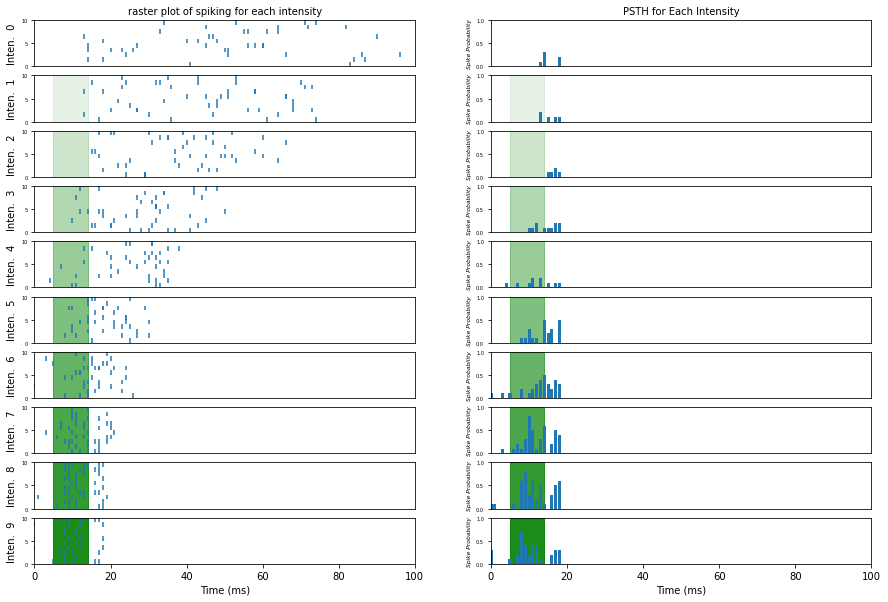

In [11]:
fig = plt.figure(figsize=[15, 10])
num_intensities = len(ten_intensities)
nbar={}

for key in ten_intensities.keys():
    # Raster plots
    ax = plt.subplot(num_intensities, 2, float(key[0]) * 2 + 1) 
    for trial in range(10): 
        plt.vlines(ten_intensities[key][trial], trial, trial + 1)
    plt.xlim([0, 100])
    plt.ylim([0, 10])
    plt.ylabel('Inten.  ' + str(key[0]), fontsize=10)
    plt.yticks(fontsize=5)    
    plt.axvspan(5, 14, alpha=0.1*float(key[0]), color='g')
    if float(key[0]) < 9:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('Time (ms)')
    if float(key[0]) == 0:
        plt.title('raster plot of spiking for each intensity',fontsize=10)
        
    # PSTHs    
    ax = plt.subplot(num_intensities, 2, float(key[0]) * 2 + 2)
    plt.axvspan(5, 14, alpha=0.1*float(key[0]), color='g')
    spike_times = [a for b in ten_intensities[key] for a in b]     
    n_out, bins = np.histogram(spike_times, bins=range(20))    
    nbar[float(key[0])] = n_out / 10.
    plt.bar(bins[:-1], n_out / 10.)
    plt.xlim([0,100])
    plt.ylim([0,1])
    plt.yticks(fontsize=5)
    plt.ylabel('Spike Probability',style='italic',fontsize = 6)
    if float(key[0]) == 0:
        plt.title('PSTH for Each Intensity',fontsize=10)
    if float(key[0]) < num_intensities-1:
        plt.xlabel('')
        plt.xticks([])
    else:
        plt.xlabel('Time (ms)')
        
plt.show()

This is definitely weird - it looks like the spikes are spread out differently over time, at different intensity levels. What I suspect is that the authors used a couple of tricks to generate this data - it's not real spike data. As I noted earlier, it looks like the data may have been generated by a random number generator, since they aren't ordered in time, and there's at least one instance of the same value occurring twice in the same trial, which doesn't make sense - how could an electrode record two action potentials from one neuron at the same time? The plot above suggests that the authors generated random values across a range from 1-100 for each intensity level, but then applied a second function that increasingly compressed the time as intensity level increased. They then set a cutoff of 20 s to hide the extraneous data. This resulted in a data set that, over the range of time they planned to plot, there were increasing numbers of spikes, making it appear as if the "neuron" was indeed sensitive to light intensity. 

To be clear, this is not a criticism of the authors; it's really quite an ingenious way to generate data that displays what they wanted. All I'm doing is trying to demonstrate how you can explore data that you're given, essentially "hack" it, and try to understand it better. By being able to understand what every line of code does, break it down, and manipulate it, you can learn a lot! Had I done this, I probably would have removed all of the values in the lists >20 to avoid confusion, but on the other hand by leaving it in, the authors provided this opportunity for exploration and explanation!

Anyway, in this case hard-coding the *x* axis limits makes perfect sense, because we don't want to be flexible or data-driven; rather we want to explicitly limit the plot to a specific and fixed range of values.

### Nested list comprehension

Finally, this line is interesting:

    [a for b in ten_intensities[key] for a in b] 

This is **nested list comprehension**, which applies list comprehension to lists of lists. As noted earlier, each entry in the `ten_intensities` dictionary is a list containing 10 lists, one for each trial:

In [12]:
ten_intensities['0_intensity']

[[83.0, 41.0],
 [14.0, 87.0, 18.0, 84.0],
 [24.0, 51.0, 66.0, 86.0, 96.0],
 [26.0, 14.0, 51.0, 20.0, 50.0, 23.0],
 [14.0, 27.0, 60.0, 45.0, 56.0, 58.0, 60.0],
 [48.0, 18.0, 40.0, 43.0],
 [13.0, 46.0, 47.0, 90.0],
 [33.0, 61.0, 55.0, 64.0, 56.0],
 [72.0, 64.0, 45.0, 82.0],
 [34.0, 74.0, 71.0, 53.0]]

In its simplest form, as used here, nested list comprehension is a way to convert a list of lists to one long list.

The syntax probably looks confusing, to say the least! But it's relatively simple once you learn to read it. In the code

    [a for b in ten_intensities[key] for a in b] 

`b` stands for each item (list) in the list of lists, and `a` stands for the individual items within `b`. For example, in `ten_intensities['0_intensity']` as shown above, for the first item `b` would be `[83.0, 41.0]` and `a` would be `83.0` and `41.0`. So we could read this as "Return `a` (values) for `b` (lists) in ten_intensities[key] (list of lists) for all items (`a`) in each list (`b`)". Since there are square brackets around the entire expression, the result is a list of all these values.

As we see below, if we run this nested list comprehension on the `0_intensity` dictionary values, we get one long list with all the values from the list of lists above, sequentially:

In [13]:
[a for b in ten_intensities['0_intensity'] for a in b] 

[83.0,
 41.0,
 14.0,
 87.0,
 18.0,
 84.0,
 24.0,
 51.0,
 66.0,
 86.0,
 96.0,
 26.0,
 14.0,
 51.0,
 20.0,
 50.0,
 23.0,
 14.0,
 27.0,
 60.0,
 45.0,
 56.0,
 58.0,
 60.0,
 48.0,
 18.0,
 40.0,
 43.0,
 13.0,
 46.0,
 47.0,
 90.0,
 33.0,
 61.0,
 55.0,
 64.0,
 56.0,
 72.0,
 64.0,
 45.0,
 82.0,
 34.0,
 74.0,
 71.0,
 53.0]

For a nice tutorial on list comprehension, culminating in nested list comprehension, check out [this DataCamp article](https://www.datacamp.com/community/tutorials/python-list-comprehension).